# Integrating Rate Equations with Python

You have integrated the classic first order and second order rate equations. The question I would ask is why? These equations were integrated 100 years ago and the answers have been available since then. Of course, this is an example so that you know that it can be used in more complicated systems. As we will soon see, that was a lie.

Once we get to even slightly more complicated systems we quickly end up with integrations that are complex and often better solved with numerical methods.

## Simple Integrated Rate Laws
Here are the equations that we have solved already in you chemistry career.

### First Order

$${A}\xrightarrow{k_{obs}}{P}$$

$$-\frac{\partial A}{\partial t} = \frac{\partial P}{\partial t} = k_{obs}\cdot A$$

$$ A_t = A_0 \cdot e^{-k_{obs}t}$$

$$P_t = P_\infty - \cdot P_\infty e^{-k_{obs}t}$$

$$ t_{1/2} = \frac{\ln{2}}{k_{obs}}$$

### Second Order

$${2A}\xrightarrow{k_{obs}}{P}$$

$$-\frac{\partial A}{\partial t} = \frac{1}{2}\frac{\partial P}{\partial t} = k_{obs}\cdot A^2$$

$$ \frac{1}{A_t} = \frac{1}{A_0} + k_{obs}\cdot t$$

$$ t_{1/2} = \frac{1}{k_{obs}\cdot A_0}$$

### Second Order Again

$${A + B}\xrightarrow{k_{obs}}{P}$$

$$-\frac{\partial A}{\partial t} = -\frac{\partial B}{\partial t} = \frac{\partial P}{\partial t} = k_{obs}\cdot A\cdot B$$

$$ \frac{A_0-x}{B_0-x} = \frac{A_0}{B_0} \cdot e^{\left( A_0-B_0 \right) \cdot k_{obs}\cdot t}$$
*where x is the progress of the reaction. e.g. $A_0-x=A_t$.*

### Simple is Easy

Everything works well when reactions are simple. But what about reactions with multiple steps and reactions with multiple pathways?

## Consecutive Reactions

More complex rate laws are not easily integrated (don't let me discourage you - mathematicians are waiting to help you and the details are described in the [Integrating Rate Equations](https://moodle31.upei.ca/mod/resource/view.php?id=623407) tutorial document). I have hit the limits of my calculus powers, though. So now I will turn to the tools available in *Python*

Let us start with a straightforward consecutive reaction.

$$A \xrightarrow{k_1} B \\ B \xrightarrow{k_2} P$$

The integration tutorial document has a section where we use the symbolic math tool, *Maple* (which is available to all UPEI students), to integrate the above rate equation. We could also use the *Python* package *SymPy*, which provides the functionality of a symbolic math system (but without the super-helpful GUI interface of *Maple*). Both ways seem like too much work. 

Let's use numerical methods to get the concentrations over time. This will let us model a reaction and see how concentrations change over time.  It will not give us a function that we can use to curve fit data.  We would have to actually integrate the rate law using analytical methods to do that. Keep those mathematicians on speed-dial. (I have no doubt that there are methods available in the *Python* ecosystem that will optimize parameters in a numerical integration to fit a set of data. Let me know if you ever come across them and please write a detailed instruction manual for me.)

In the code below we will state the rate law for each reaction and then use the tools of the *SciPy* package to integrate the system numerically.  This will give us the concentrations of reactants over time for various values of $k_1$, $k_2$ and $A_0$.

The `scipy.integrate.odeint()` function will perform a numerical integration of a system of ordinary differential equations. The rate laws for each step make up this set of equations.

### Observations

We can see that the concentration of A will dissappear according to first order reaction kinetics. This is because the consumption of A is a first order irreversible reaction. The concentrations of the intermediate, B, and the product, P, do not follow the simple math of first or second order kinetics. The numerical integration will calculate their concentrations according to the rates of appearance and dissappearance.

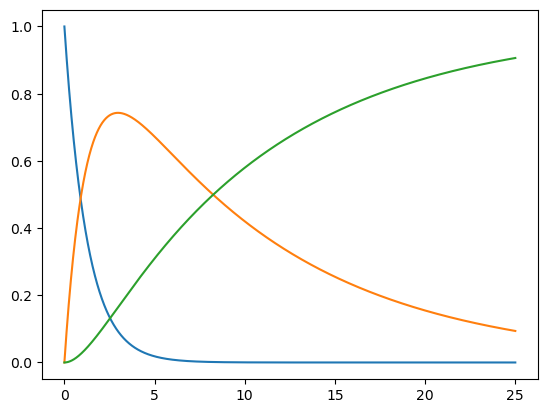

In [1]:
#######################
### import packages ###
#######################

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#########################################
### Create series of time points      ###
#########################################

dt = 0.01                                    # time step, delta t
tmax = 25                                    # max time, s
t = np.linspace(0, tmax, num = int(tmax/dt)) # time vector (list of time points)
nt = len(t)                                  # total number of time steps


############################################
### Create a function that describes the ###
### rates of all reactions in the system ###
############################################

def rates(c, t):
    """
    A function that finds the instantaneous rate of each reaction when given
    the concentration of each reactant
    
    reation scheme is A --> B --> C
    
    c is a list of concentrations
    t is a list of time points
    
    K1 = rate constant for first step
    K2 = rate constant for second step

    A = conc of A.
    B = conc of B.
    C = conc of C.
    
    ra = instantanous rate of change in [A]
    rb = instantanous rate of change in [B]
    rc = instantanous rate of change in [C]

    """
    K1 = 0.8   # these are the rate constants. Change tham and have fun.
    K2 = 0.1
    
    A = c[0]; B = c[1]; C = c[2]    # assign conc. from input list c
    
    ra = -K1 * A                    # rates of each reaction step with give concentration in list c
    rb = (K1 * A)-(K2 * B)
    rc = K2 * B
    return [ra, rb, rc]


####################################################################
### The function odeint() from scipy.integrate takes a function, ###
### a list of initial conditions, and an array of time points.   ###
### It returns a matrix with each column being the result for    ###
### each variable at each time point.                            ###
####################################################################

cc = odeint(rates, [1, 0, 0], t)
#display(t,cc)

plt.plot(t,cc)

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined four plots

## Steady State System

You will recall the example of complex reactions that you explored in physical chemistry. Here is an example where the initial reaction is reversible, followed by an irreversible reaction that produces the product.

$$ A\rightleftharpoons B \rightarrow P$$

And could be expressed with the following reactions.

$$A \xrightarrow{k_1} B \\ 
B \xrightarrow{k_{-1}} A \\
B \xrightarrow{k_2} P$$

This may be interpreted as an equilibrium followed by a final step or as a steady-state system where the reverse reaction and the final step are fast so that the intermediate never reaches an equilibrium concentration. If $k_2 << k_{-1}$ then it would be a pre-equilibrium case. If $k_2 >> k_{-1}$ then it is a steady state case. Of course, it could be in-between as well...

### Observations

The concentration of intermediate never builds up in a steady state system. It is present at a small concentration, which doesn't change much over time in comparison to the larger changes in concentration of reactant and product. Change the values for $k_2$ and $k_{-1}$ and observe the results. Explore the extremes to make clear cases of a pre-equilibrium system and a steady-state system. Have fun.

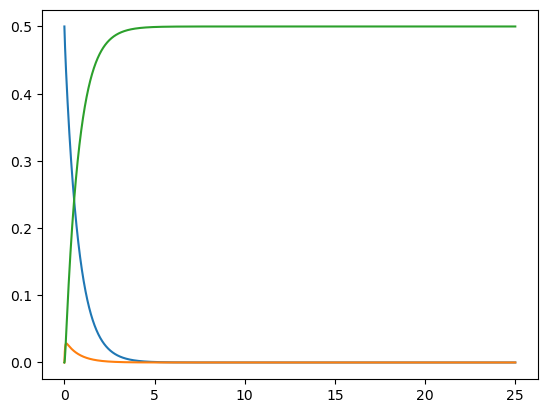

In [2]:
#######################
### import packages ###
#######################

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


#########################################
### Create series of time points      ###
#########################################

dt = 0.0001                                # time step, delta t
tmax = 25                                  # max time, s
t = np.linspace(0, tmax, num=int(tmax/dt)) # time vector (list of time points)
nt = len(t)                                # total number of time steps


############################################
### Create a function that describes the ###
### rates of all reactions in the system ###
############################################

def rates(c, t):
    K1 = 2        # these are the rate constants. Change tham and have fun.
    K_1 = 10
    K2 = 20
    
    A = c[0]; B = c[1]; C = c[2]      # assign initial conc. from input list c
    
    ra = -(K1 * A)+(K_1 * B)          # rates of each reaction step with give concentration in list c
    rb = (K1 * A)-(K2 * B)-(K_1 * B)
    rc = K2 * B
    return [ra, rb, rc]


####################################################################
### The function odeint() from scipy.integrate takes a function, ###
### a list of initial conditions, and an array of time points.   ###
### It returns a matrix with each column being the result for    ###
### each variable at each time point.                            ###
####################################################################

cc = odeint(rates, [.5, 0, 0], t)
#display(t,cc)

plt.plot(t,cc)

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined four plots

## Salt Inhibition

Let us take the example above and imagine that it is the solvolysis of t-butyl chloride. This is a classic example of inhibition by the intermediate. 

$$ tBuCo\rightleftharpoons tBu^+ + Cl^- \xrightarrow{H_2O} P$$

And could be epressed with the following reactions.

$$A \xrightarrow{k_1} B + X \\ 
B + X \xrightarrow{k_{-1}} A \\
B \xrightarrow{k_2} P$$

Note that $\left[H_2O\right]$ is not in the $k_2$ rate term because it is the solvent and its concentration does not cahnge.

Since the chloride leaving group can react with the carbocation to return the system to the starting material, more chloride will reduce the concentration of carbocation. Therefore, adding chloride salt to the solution will slow the appearance of product. We can get the integrated rate equations by adding this term, to the list of rates (the rate if appearance of X, which we will call rx) and then performing the integration as above.

Change the concentration of X by changing the final value in the integration method call `sp.integrate.odeint(rates, [1, 0, 0, 0.2], t)`.  In the code below the last value on the list is the salt concentration, \[X\].

The code below will plot the value of the product concentration vs. time in three cases of \[X\]

### Observations

The $k_obs$ for the reaction is smaller as we add more of the salt of the leaving group (chloride ion in this case). If you derive the rate law you will see that...

$$ \frac{-\partial}{\partial t}\left[A\right] = \frac{k_1 \cdot k_2}{k_{-1} \cdot \left[Cl\right] + k_2} \left[A\right]$$

and therefore...

$$ \frac{-\partial}{\partial t}\left[A\right] = k_{obs} \left[A\right]$$

where...

$$ k_{obs} = \frac{k_1 \cdot k_2}{k_{-1} \left[Cl\right] + k_2}$$

The equation for $k_{obs}$ shows that the value will decrease as the concentration of chloride increases.

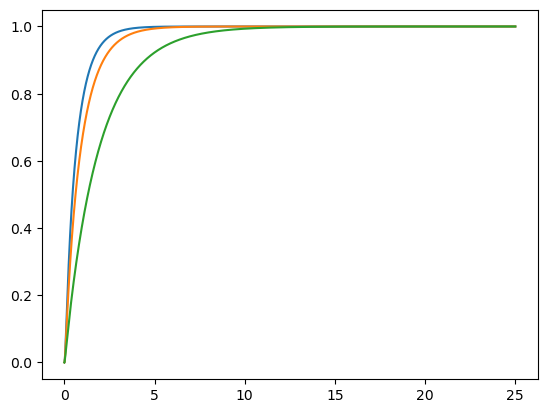

In [3]:
#######################
### import packages ###
#######################

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#########################################
### Create series of time points      ###
#########################################

dt = 0.0001                                # time step, delta t
tmax = 25                                  # max time, s
t = np.linspace(0, tmax, num=int(tmax/dt)) # time vector (list of time points)
nt = len(t)                                # total number of time steps


############################################
### Create a function that describes the ###
### rates of all reactions in the system ###
############################################

def rates(c, t):
    K1 = 2        # these are the rate constants. Change tham and have fun.
    K_1 = 10
    K2 = 20
    
    A = c[0]; B = c[1]; C = c[2]; X = c[3]  # assign initial conc. from input list c

    ra = -(K1 * A)+(K_1 * B * X)            # rates of each reaction step with give concentration in list c
    rb = (K1 * A)-(K2 * B)-(K_1 * B * X)
    rc = K2 * B
    rx = (K1 * A)-(K_1 * B * X)
    return [ra, rb, rc, rx]


####################################################################
### The function odeint() from scipy.integrate takes a function, ###
### a list of initial conditions, and an array of time points.   ###
### It returns a matrix with each column being the result for    ###
### each variable at each time point.                            ###
####################################################################

cc = odeint(rates, [1, 0, 0, 0.], t)
plt.plot(t,cc[:,2])                    # Plot only the values for C (column #2 of the array)

cc = odeint(rates, [1, 0, 0, 1], t)
plt.plot(t,cc[:,2])                    # Plot only the values for C (column #2 of the array)

cc = odeint(rates, [1, 0, 0, 5], t)
plt.plot(t,cc[:,2])                    # Plot only the values for C (column #2 of the array)


#######################################
### Output the three combined plots ###
#######################################

#fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined four plots